# NLP Project

## Project Goals
* Webscrape 682 top starred repositories on GitHub and clean the data.
* Explore to find features that indicate a specific programming language.
* Based on the findings predict the main programming language of an out-of-sample repository.

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import re

import acquire as a
import prepare as p
import explore as e
#import modeling as m

# Acquire

* Data acquired from GitHub starred repos README files

# Prepare

**Prepare Actions:**
* Determine the top five languages and lump all others as "Other" (NULLs have been kept and listed as "Not Listed")
* README content prep:
    * Normalize language (remove any non-ASCII characters aka. other languages)
    * Remove all punctuation
    * Make all lowercase
    * Determine stopwords by looking words that appear evenly across all languages and remove them
* Split data into train, validate and test (approx. 60/25/15), stratifying on 'language'
* Scaled continuous variable

## Data dictionary
| Feature | Definition | Type |
|:--------|:-----------|:-------
|**repo**| Name of the repository on GitHub| *string*|
|**word_freq**| Number of times a word appears across all README| *float*|
|**lemmatized_len**| Number of characters in| *int*|
|**username**| Username of GitHub user| *string*|
|**???**| Definition| *type*|
|**???**| Definition| *type*|
|**???**| Definition| *type*|
|**Target variable**
|**language**| Primary programming language used in the repository | *string* |


In [2]:
# acquiring data
df = a.acquire_readmes()

# prepping data
df = p.prep_df_for_nlp(df,'readme_contents',extra_words=p.EXTRA_WORDS)

# splitting data into train, validate, and test
train, validate, test = p.split_data(df, 'language')

## A brief look at the data

In [3]:
train.head()

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
482,awesome-actions,Not Listed,"<p align=""center"">\n <br>\n <img src=""awes...",p aligncenter br srcawesomeactionspng width150...,p aligncent br srcawesomeactionspng width150 b...,p aligncenter br srcawesomeactionspng width150...,sdras,34287
646,InstaPy,Python,"<p align=""center"">\n <img src=""https://i.imgu...",p aligncenter srchttpsiimgurcomsjzfzsljpg widt...,p aligncent srchttpsiimgurcomsjzfzsljpg width1...,p aligncenter srchttpsiimgurcomsjzfzsljpg widt...,InstaPy,2643
474,osquery,Other,"# osquery\n\n<p align=""center"">\n<img alt=""osq...",osquery p aligncenter altosquery logo width200...,osqueri p aligncent altosqueri logo width200 s...,osquery p aligncenter altosquery logo width200...,osquery,4604
545,Best-App,Not Listed,\nBest App\n----\n\n*经常会有朋友想知道有哪些 Apps 或 服务 是值...,best app apps bestapp ios app httpsappsappleco...,best app app bestapp io app httpsappsapplecomc...,best app apps bestapp io app httpsappsapplecom...,hzlzh,17437
539,actix-web,Other,actix-web/README.md,actixwebreadmemd,actixwebreadmemd,actixwebreadmemd,actix,16


# Explore

## Does the name of the programming language appearing in the README indicate the main programming language?

## Does the frequency of a certain word within a README indicate the main programming language?

In [12]:
#split into a df per language category
go, java, javascript, not_listed, other, python, typescript = e.split_by_language(train)

In [17]:
javascript_words_freq = e.get_ngram_frequency(javascript.lemmatized)
python_words_freq = e.get_ngram_frequency(python.lemmatized)
typescript_words_freq = e.get_ngram_frequency(typescript.lemmatized)
go_words_freq = e.get_ngram_frequency(go.lemmatized)
other_series_freq = e.get_ngram_frequency(other.lemmatized)
not_listed_freq = e.get_ngram_frequency(not_listed.lemmatized)
java_words_freq = e.get_ngram_frequency(java.lemmatized)
all_words_freq = e.get_ngram_frequency(train.lemmatized)

In [18]:
word_counts = (pd.concat([all_words_freq, javascript_words_freq,typescript_words_freq,go_words_freq, python_words_freq, java_words_freq, other_series_freq, not_listed_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript','typescript','go', 'python', 'java','other','not_listed'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
word_counts_limited = word_counts[(word_counts.index=='javascript') | (word_counts.index=='python') | (word_counts.index=='typescript') | (word_counts.index=='go') | (word_counts.index=='java')]


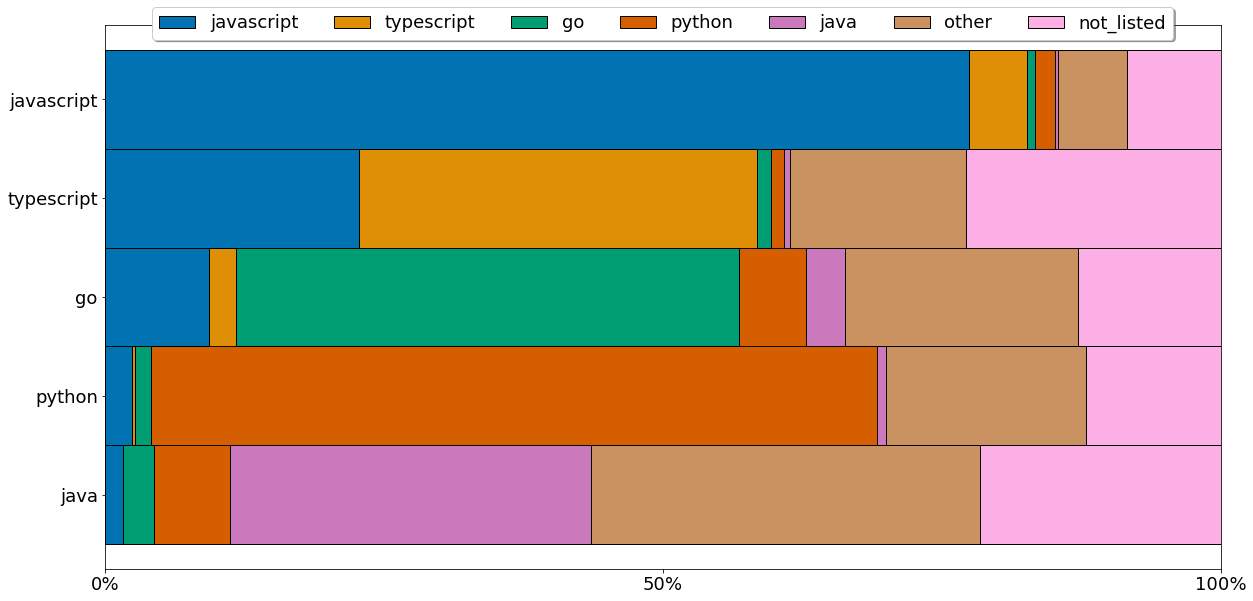

In [33]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
plt.rcParams.update({'font.size': 18})

(word_counts_limited.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by='javascript')
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False, ax=ax, color=sns.color_palette('colorblind'))
)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=7, fancybox=True, shadow=True)
ax.set_xlim(0,1)
ax.set_xticks([0,.5,1],['0%','50%','100%'])
plt.show()

## Does the length of the README indicate the main programming language?

<AxesSubplot:xlabel='language', ylabel='lemmatized_len'>

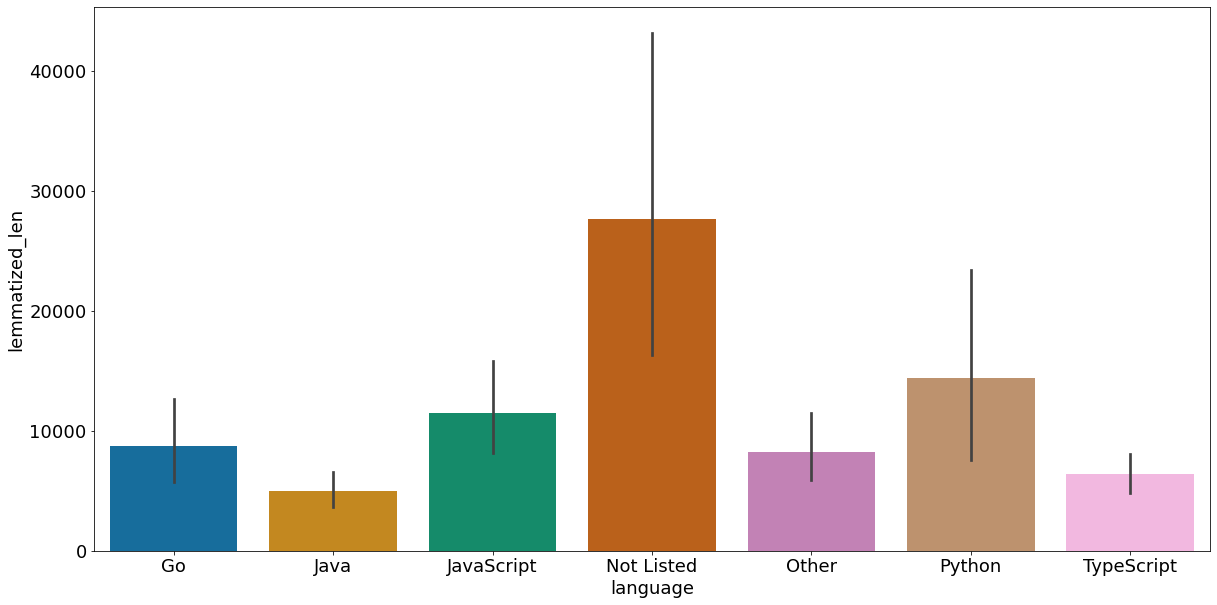

In [27]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
sns.barplot(x="language", y="lemmatized_len", data=train, palette='colorblind', ax=ax)

In [14]:
stat, p = stats.kruskal(go.lemmatized_len, java.lemmatized_len, javascript.lemmatized_len, not_listed.lemmatized_len, other.lemmatized_len, python.lemmatized_len, typescript.lemmatized_len)

In [16]:
e.p_to_md(p)

## Because $\alpha$ > p,we  reject $H_0$

## Does the repo title indicate the main programming language?

# Exploration Summary

* ?????

# Features I am moving to modeling With
* ?????

# Features I'm not moving to modeling with
* ????? 

# Modeling
* ??????

In [4]:
# prep data for modeling
#train_X, validate_X, test_X, train_y, validate_y, test_y = m.model_prep(train,validate,test)

## Decision Tree

* Decision Tree accuracy is about equal to the baseline

## Random Forest

* Random Forest accuracy is about equal to the baseline

## Logistic Regression

* Logistic regression accuracy is about equal to the baseline


## KNN

* Logistic regression accuracy is better than baseline on train, and worse than baseline on validate
* It is likely over-fit

# Comparing Models

* Decision Tree, Random Forest, and Logistic Regression models all performed about equal to baseline on train and validate
* The KNN model performed slightly better on train data but was worse on validate data. It is likely overfit.
* Because the results of the Decision Tree, Random Forest, and Logistic Regression models were all very similar I could proceed to test with any of these models.
* I have chosen to move forward with the Logistic Regression model

## Logistic Regression on Test

### Modeling Summary

* Decision Tree, Random Forest, and Logistic Regression models all performed about equal to baseline on train and validate
* The KNN model performed slightly better on train data but was worse on validate data. It is likely overfit.
* A Logistic Regression model selected as the final model and had an accuracy of about 67% which is about equal to the baseline accuracy

# Conclusions

### Exploration

* Upsets in chess occur in about 1/3 of games
* Games in which the lower rated player makes the first move, and games that are rated have a slightly higher chance of ending in an upset 
* Games ending in upset have a much lower mean difference in player rating than games not ending in upset
* Games using shorter time control, such as Bullet, Blitz, and Rapid games, have an upset percentage that closely mirrors the overall upset percentage ranging from 30-34% while standard games have a much lower upset percentage at 22%
* Looking at the top 10 openings in terms of frequency in the data set we can conclude that a given opening does affect the likelihood of a game ending in an upset. Upset percentages very by opening from 20-39%
* The average rating of players in a game has no provable effect on the chance of that game ending in upset

### Modeling

**The final model failed to significantly outperform the baseline. Possible reasons include:**
* “Rated” and “lower rated white” each only accounted for a small difference in the percentage of upsets
* While “Opening Name” seemed to be a significant driver of upsets. It contains 1200+ values that, once encoded, would add an overwhelming number of features to the model. 

### Recommendations

* To increase the skill intensity of a game add to the length of time players are able to consider their moves

### Next Steps
* Cluster together opening variants in "Opening Name" to reduce the number of features input into the model
* Look for other ways to describe "Opening Name" Such as by popularity of the opening or average rating of players playing that opening